In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
skt_age_201902 = pd.read_csv('SKT/FLOW_AGE_201902.CSV', sep='|')
skt_age_201903 = pd.read_csv('SKT/FLOW_AGE_201903.CSV', sep='|')
skt_age_201904 = pd.read_csv('SKT/FLOW_AGE_201904.CSV', sep='|')
skt_age_201905 = pd.read_csv('SKT/FLOW_AGE_201905.CSV', sep='|')

skt_age_202002 = pd.read_csv('SKT/FLOW_AGE_202002.CSV', sep='|')
skt_age_202003 = pd.read_csv('SKT/FLOW_AGE_202003.CSV', sep='|')
skt_age_202004 = pd.read_csv('SKT/FLOW_AGE_202004.CSV', sep='|')
skt_age_202005 = pd.read_csv('SKT/FLOW_AGE_202005.CSV', sep='|')

In [15]:
skt_age_2019 = pd.concat([skt_age_201902,skt_age_201903,skt_age_201904,skt_age_201905], axis=0)
skt_age_2020 = pd.concat([skt_age_202002,skt_age_202003,skt_age_202004,skt_age_202005], axis=0)

In [16]:
skt_data = pd.concat([skt_age_2019, skt_age_2020], axis=0)
skt_data

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,202005,20200527,2726069000,고산3동,0.00,70.07,519.05,956.45,1205.44,1507.57,...,1201.14,1106.57,1728.34,2209.31,2808.54,2721.54,2070.62,1613.50,1086.34,1143.37
2135,202005,20200528,2726069000,고산3동,0.00,99.04,749.36,1085.68,1639.82,1777.32,...,1377.94,1258.02,1847.61,2677.19,3342.68,3036.71,2389.70,1848.92,1291.19,1515.36
2136,202005,20200529,2726069000,고산3동,0.00,155.70,781.70,1235.94,1706.97,1982.74,...,1583.58,1487.06,2149.30,2916.87,3643.31,3395.24,2800.02,2043.25,1356.15,1455.89
2137,202005,20200530,2726069000,고산3동,0.00,119.89,903.85,1236.60,1722.01,2142.41,...,1644.73,1420.31,1812.27,2640.71,3362.25,2909.34,2353.82,1812.56,1242.56,1372.38


In [17]:
date_table = pd.read_csv("date_table.csv")
date_table

,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
0,20190201,2019,2,1,4,4,금
1,20190202,2019,2,2,4,5,토
2,20190203,2019,2,3,5,6,일
3,20190204,2019,2,4,5,0,월
4,20190205,2019,2,5,5,1,화
...,...,...,...,...,...,...,...
236,20200527,2020,5,27,21,2,수
237,20200528,2020,5,28,21,3,목
238,20200529,2020,5,29,21,4,금
239,20200530,2020,5,30,21,5,토


In [18]:
skt_data = skt_data.merge(date_table, how='left', left_on = 'STD_YMD', right_on = 'STD_DD')
skt_data

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,5757.53,3359.85,4431.71,20190201,2019,2,1,4,4,금
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,3838.77,2453.97,3207.26,20190202,2019,2,2,4,5,토
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,2484.98,1511.67,1954.98,20190203,2019,2,3,5,6,일
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,2164.35,1230.21,1520.35,20190204,2019,2,4,5,0,월
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,3265.62,1692.74,2147.09,20190205,2019,2,5,5,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,202005,20200527,2726069000,고산3동,0.00,70.07,519.05,956.45,1205.44,1507.57,...,1613.50,1086.34,1143.37,20200527,2020,5,27,21,2,수
16625,202005,20200528,2726069000,고산3동,0.00,99.04,749.36,1085.68,1639.82,1777.32,...,1848.92,1291.19,1515.36,20200528,2020,5,28,21,3,목
16626,202005,20200529,2726069000,고산3동,0.00,155.70,781.70,1235.94,1706.97,1982.74,...,2043.25,1356.15,1455.89,20200529,2020,5,29,21,4,금
16627,202005,20200530,2726069000,고산3동,0.00,119.89,903.85,1236.60,1722.01,2142.41,...,1812.56,1242.56,1372.38,20200530,2020,5,30,21,5,토


In [19]:
skt_data[skt_data['STD_YM']==201905]

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
6141,201905,20190501,1114052000,소공동,0.00,168.81,1319.72,2238.15,5382.96,8636.64,...,5176.16,3395.22,4377.94,20190501,2019,5,1,17,2,수
6142,201905,20190502,1114052000,소공동,0.00,114.17,822.78,2378.65,6129.18,11210.43,...,6456.46,3965.53,5175.43,20190502,2019,5,2,17,3,목
6143,201905,20190503,1114052000,소공동,0.00,133.50,1003.99,3286.87,7287.47,12167.90,...,6400.17,4007.16,5220.62,20190503,2019,5,3,17,4,금
6144,201905,20190504,1114052000,소공동,0.11,340.74,1488.38,2681.65,5909.81,9259.44,...,5362.60,3420.72,4480.37,20190504,2019,5,4,17,5,토
6145,201905,20190505,1114052000,소공동,0.20,330.86,1641.64,2346.88,4609.35,7339.99,...,3775.14,2468.15,3334.38,20190505,2019,5,5,18,6,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,201905,20190527,2726069000,고산3동,0.00,160.91,604.28,994.41,1305.36,1679.60,...,1642.78,870.96,1050.98,20190527,2019,5,27,21,0,월
8276,201905,20190528,2726069000,고산3동,0.00,151.66,617.83,963.84,1291.84,1716.82,...,1805.31,974.83,1131.32,20190528,2019,5,28,21,1,화
8277,201905,20190529,2726069000,고산3동,0.00,147.68,675.46,1006.99,1319.99,1721.71,...,1747.05,1019.86,1105.85,20190529,2019,5,29,21,2,수
8278,201905,20190530,2726069000,고산3동,0.00,150.40,599.51,978.03,1231.77,1783.48,...,1702.65,989.13,1190.72,20190530,2019,5,30,21,3,목


In [20]:
cj_data = pd.read_excel("cj/cj_realdata.xlsx")
cj_data

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


In [21]:
cj_data['DL_YMD'] = cj_data['DL_YMD'] + 20000000
cj_data

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,20190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,20190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,20190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,20190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,20190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
156566,20200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
156567,20200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21
156568,20200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
156569,20200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


In [22]:
cj_data = cj_data.merge(date_table, how='left', left_on = 'DL_YMD', right_on = 'STD_DD')

In [23]:
# dong 정보 추출
dong_info  = cj_data[['CTPV_NM', 'CTGG_NM', 'HDNG_NM']].drop_duplicates()

# sk데이터에 동 정보 삽입
sk_data = skt_data.merge(dong_info, how='left', left_on = "HDONG_NM", right_on = "HDNG_NM")

# sk데이터에 동 정보 삽입
#sk_2020 = skt_age_2020.merge(dong_info, how='left', left_on = "HDONG_NM", right_on = "HDNG_NM")

sk_2019 = sk_data[sk_data['year'] == 2019]
sk_2020 = sk_data[sk_data['year'] == 2020]
cj_2019 = cj_data[cj_data['year'] == 2019]
cj_2020 = cj_data[cj_data['year'] == 2020]

In [34]:
set(sk_2020['STD_YM'].values)

{202002, 202003, 202004, 202005}

In [41]:
# sk. cj 각 년도별 서울 / 대구 데이터 분리
sk_2019_seoul = sk_2019[sk_2019['CTPV_NM'] == '서울특별시']
sk_2020_seoul = sk_2020[sk_2020['CTPV_NM'] == '서울특별시']
sk_2019_daegu = sk_2019[sk_2019['CTPV_NM'] == '대구광역시']
sk_2020_daegu = sk_2020[sk_2020['CTPV_NM'] == '대구광역시']

cj_2019_seoul = cj_2019[cj_2019['CTPV_NM'] == "서울특별시"]
cj_2020_seoul = cj_2020[cj_2020['CTPV_NM'] == '서울특별시']
cj_2019_daegu = cj_2019[cj_2019['CTPV_NM'] == "대구광역시"]
cj_2020_daegu = cj_2020[cj_2020['CTPV_NM'] == '대구광역시']

In [43]:
sk_2019

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr,CTPV_NM,CTGG_NM,HDNG_NM
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,20190201,2019,2,1,4,4,금,서울특별시,중구,소공동
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,20190202,2019,2,2,4,5,토,서울특별시,중구,소공동
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,20190203,2019,2,3,5,6,일,서울특별시,중구,소공동
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,20190204,2019,2,4,5,0,월,서울특별시,중구,소공동
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,20190205,2019,2,5,5,1,화,서울특별시,중구,소공동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,201905,20190527,2726069000,고산3동,0.00,160.91,604.28,994.41,1305.36,1679.60,...,20190527,2019,5,27,21,0,월,대구광역시,수성구,고산3동
8276,201905,20190528,2726069000,고산3동,0.00,151.66,617.83,963.84,1291.84,1716.82,...,20190528,2019,5,28,21,1,화,대구광역시,수성구,고산3동
8277,201905,20190529,2726069000,고산3동,0.00,147.68,675.46,1006.99,1319.99,1721.71,...,20190529,2019,5,29,21,2,수,대구광역시,수성구,고산3동
8278,201905,20190530,2726069000,고산3동,0.00,150.40,599.51,978.03,1231.77,1783.48,...,20190530,2019,5,30,21,3,목,대구광역시,수성구,고산3동


In [44]:
flow_columns = ['MAN_FLOW_POP_CNT_0004',
       'MAN_FLOW_POP_CNT_0509', 'MAN_FLOW_POP_CNT_1014',
       'MAN_FLOW_POP_CNT_1519', 'MAN_FLOW_POP_CNT_2024',
       'MAN_FLOW_POP_CNT_2529', 'MAN_FLOW_POP_CNT_3034',
       'MAN_FLOW_POP_CNT_3539', 'MAN_FLOW_POP_CNT_4044',
       'MAN_FLOW_POP_CNT_4549', 'MAN_FLOW_POP_CNT_5054',
       'MAN_FLOW_POP_CNT_5559', 'MAN_FLOW_POP_CNT_6064',
       'MAN_FLOW_POP_CNT_6569', 'MAN_FLOW_POP_CNT_70U',
       'WMAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0509',
       'WMAN_FLOW_POP_CNT_1014', 'WMAN_FLOW_POP_CNT_1519',
       'WMAN_FLOW_POP_CNT_2024', 'WMAN_FLOW_POP_CNT_2529',
       'WMAN_FLOW_POP_CNT_3034', 'WMAN_FLOW_POP_CNT_3539',
       'WMAN_FLOW_POP_CNT_4044', 'WMAN_FLOW_POP_CNT_4549',
       'WMAN_FLOW_POP_CNT_5054', 'WMAN_FLOW_POP_CNT_5559',
       'WMAN_FLOW_POP_CNT_6064', 'WMAN_FLOW_POP_CNT_6569',
       'WMAN_FLOW_POP_CNT_70U']

In [45]:
# 2019/2020년 서울/대구의 유동인구 총 량
sk_2019_seoul['flow_sum'] = sk_2019_seoul[flow_columns].sum(axis=1)
sk_2020_seoul['flow_sum'] = sk_2020_seoul[flow_columns].sum(axis=1)
sk_2019_daegu['flow_sum'] = sk_2019_daegu[flow_columns].sum(axis=1)
sk_2020_daegu['flow_sum'] = sk_2020_daegu[flow_columns].sum(axis=1)
flow_2019_sum_seoul = sk_2019_seoul['flow_sum'].sum()
flow_2020_sum_seoul = sk_2020_seoul['flow_sum'].sum()
flow_2019_sum_daegu = sk_2019_daegu['flow_sum'].sum()
flow_2020_sum_daegu = sk_2020_daegu['flow_sum'].sum()

# 2019/2020년 서울/대구의 물류 총 량 
dist_2019_sum_seoul = cj_2019_seoul['INVC_CONT'].sum()
dist_2020_sum_seoul = cj_2020_seoul['INVC_CONT'].sum()
dist_2019_sum_daegu = cj_2019_daegu['INVC_CONT'].sum()
dist_2020_sum_daegu = cj_2020_daegu['INVC_CONT'].sum()

In [46]:
# 각 년도별 서울 / 대구 유동인구 총 량으로 나누어 수치 보정
sk_2019_seoul['flow_sum'] = sk_2019_seoul['flow_sum'] / flow_2019_sum_seoul
sk_2020_seoul['flow_sum'] = sk_2020_seoul['flow_sum'] / flow_2020_sum_seoul
sk_2019_daegu['flow_sum'] = sk_2019_daegu['flow_sum'] / flow_2019_sum_daegu
sk_2020_daegu['flow_sum'] = sk_2020_daegu['flow_sum'] / flow_2020_sum_daegu

# 각 년도별 서울 / 대구 유동인구 총 량으로 나누어 수치 보정
cj_2019_seoul['INVC_CONT'] = cj_2019_seoul['INVC_CONT'] / dist_2019_sum_seoul
cj_2020_seoul['INVC_CONT'] = cj_2020_seoul['INVC_CONT'] / dist_2020_sum_seoul
cj_2019_daegu['INVC_CONT'] = cj_2019_daegu['INVC_CONT'] / dist_2019_sum_daegu
cj_2020_daegu['INVC_CONT'] = cj_2020_daegu['INVC_CONT'] / dist_2020_sum_daegu

In [47]:
# 소비 위축이 두드러지게 나타냈던 7, 8, 9, 10주차의 유동인구량
sk_2019_seoul_decrease = pd.DataFrame()
sk_2020_seoul_decrease = pd.DataFrame()
sk_2019_daegu_decrease = pd.DataFrame()
sk_2020_daegu_decrease = pd.DataFrame()

for week in range(7,11):
    temp_2019_seoul = sk_2019_seoul[sk_2019_seoul['week_num'] == week]
    temp_2020_seoul = sk_2020_seoul[sk_2020_seoul['week_num'] == week]
    temp_2019_daegu = sk_2019_daegu[sk_2019_daegu['week_num'] == week]
    temp_2020_daegu = sk_2020_daegu[sk_2020_daegu['week_num'] == week]
    sk_2019_seoul_decrease = sk_2019_seoul_decrease.append(temp_2019_seoul)
    sk_2020_seoul_decrease = sk_2020_seoul_decrease.append(temp_2020_seoul)
    sk_2019_daegu_decrease = sk_2019_daegu_decrease.append(temp_2019_daegu)
    sk_2020_daegu_decrease = sk_2020_daegu_decrease.append(temp_2020_daegu)

# 소비 위축이 두드러지게 나타났던 7, 8, 9, 10주차의 물류량
cj_2019_seoul_decrease = pd.DataFrame()
cj_2020_seoul_decrease = pd.DataFrame()
cj_2019_daegu_decrease = pd.DataFrame()
cj_2020_daegu_decrease = pd.DataFrame()

for week in range(7,11):
    temp_2019_seoul = cj_2019_seoul[cj_2019_seoul['week_num'] == week]
    temp_2020_seoul = cj_2020_seoul[cj_2020_seoul['week_num'] == week]
    temp_2019_daegu = cj_2019_daegu[cj_2019_daegu['week_num'] == week]
    temp_2020_daegu = cj_2020_daegu[cj_2020_daegu['week_num'] == week]
    cj_2019_seoul_decrease = cj_2019_seoul_decrease.append(temp_2019_seoul)
    cj_2020_seoul_decrease = cj_2020_seoul_decrease.append(temp_2020_seoul)
    cj_2019_daegu_decrease = cj_2019_daegu_decrease.append(temp_2019_daegu)
    cj_2020_daegu_decrease = cj_2020_daegu_decrease.append(temp_2020_daegu)

In [48]:
# 서울시/대구 전체(중구 + 노원구)의 2019/2020 총 유동인구량(7, 8, 9, 10주차)
flow_2019_total_seoul = sk_2019_seoul_decrease['flow_sum'].sum()
flow_2020_total_seoul = sk_2020_seoul_decrease['flow_sum'].sum()
flow_2019_total_daegu = sk_2019_daegu_decrease['flow_sum'].sum()
flow_2020_total_daegu = sk_2020_daegu_decrease['flow_sum'].sum()

# 서울시/대구 전체(중구 + 노원구)의 2019/2020 총 물류량(7, 8, 9, 10주차)
dist_2019_total_seoul = cj_2019_seoul_decrease['INVC_CONT'].sum()
dist_2020_total_seoul = cj_2020_seoul_decrease['INVC_CONT'].sum()
dist_2019_total_daegu = cj_2019_daegu_decrease['INVC_CONT'].sum()
dist_2020_total_daegu = cj_2020_daegu_decrease['INVC_CONT'].sum()

In [49]:
flow_2019_total_seoul

0.24741421832653754

In [51]:
flow_2020_total_seoul

0.21972883222598527

In [53]:
# 서울시 전체의 19년 대비 20년의 유동인구 감소지수(7, 8, 9, 10주차 기준)
# 산출식 = (2019년도 서울시 유동인구 총 량 - 2020년도 서울시 유동인구 총 량) / 2019년 서울시 유동인구 총 량
seoul_flow_index = (flow_2019_total_seoul - flow_2020_total_seoul) / flow_2019_total_seoul
seoul_flow_index

0.11189892920387084

In [54]:
# 대구광역시 전체의 19년 대비 20년의 유동인구 감소지수(7, 8, 9, 10주차 기준)
# 산출식 = (2019년도 대구광역시 유동인구 총 량 - 2020년도 대구광역시 유동인구 총 량) / 2019년 대구광역시 유동인구 총 량
daegu_flow_index = (flow_2019_total_daegu - flow_2020_total_daegu) / flow_2019_total_daegu
daegu_flow_index

0.17996142065767237

In [55]:
# 서울시 전체의 19년 대비 20년의 물류량 증가지수(7, 8, 9, 10주차 기준)
# 산출식 = (2020년도 서울시 물류 총 량 - 2019 물류년도 서울시 물류 총 량) / 2020년 서울시 물류 총 량
seoul_dist_index = (dist_2020_total_seoul - dist_2019_total_seoul) / dist_2020_total_seoul
seoul_dist_index

0.0008226538315532164

In [56]:
# 대구광역시 전체의 19년 대비 20년의 물류량 증가지수(7, 8, 9, 10주차 기준)
# 산출식 = (2020년도 대구광역시 물류 총 량 - 2019 물류년도 대구광역시 물류 총 량) / 2020년 대구광역시 물류 총 량
daegu_dist_index = (dist_2020_total_daegu - dist_2019_total_daegu) / dist_2020_total_daegu
daegu_dist_index

0.06570054532933595

In [57]:
# 서울시/대구시 행정동별 유동인구 변화량 테이블 생성
sk_2019_seoul_dong = sk_2019_seoul_decrease.pivot_table(index='HDNG_NM', values='flow_sum', aggfunc='sum')
sk_2020_seoul_dong = sk_2020_seoul_decrease.pivot_table(index='HDNG_NM', values='flow_sum', aggfunc='sum')
sk_2019_daegu_dong = sk_2019_daegu_decrease.pivot_table(index='HDNG_NM', values='flow_sum', aggfunc='sum')
sk_2020_daegu_dong = sk_2020_daegu_decrease.pivot_table(index='HDNG_NM', values='flow_sum', aggfunc='sum')

# 서울시/대구시 행정동별 물류 변화량 테이블 생성
cj_2019_seoul_dong = cj_2019_seoul_decrease.pivot_table(index='HDNG_NM', values='INVC_CONT', aggfunc='sum')
cj_2020_seoul_dong = cj_2020_seoul_decrease.pivot_table(index='HDNG_NM', values='INVC_CONT', aggfunc='sum')
cj_2019_daegu_dong = cj_2019_daegu_decrease.pivot_table(index='HDNG_NM', values='INVC_CONT', aggfunc='sum')
cj_2020_daegu_dong = cj_2020_daegu_decrease.pivot_table(index='HDNG_NM', values='INVC_CONT', aggfunc='sum')


In [58]:
# 서울시 행정동 별 유동인구 변화량 테이블 생성
# 산출식 = (각 행정동별)(2019년도 유동인구 총 량 - 2020년도 유동인구 총 량) / (2019년도 유동인구 총 량)
seoul_dong_flow_index = (sk_2019_seoul_dong - sk_2020_seoul_dong) / sk_2019_seoul_dong

In [59]:
# 대구시 행정동 별 유동인구 변화량 테이블 생성
# 산출식 = (각 행정동별)(2019년도 유동인구 총 량 - 2020년도 유동인구 총 량) / (2019년도 유동인구 총 량)
daegu_dong_flow_index = (sk_2019_daegu_dong - sk_2020_daegu_dong) / sk_2019_daegu_dong

In [60]:
# 서울시 행정동 별 물류 변화량 테이블 생성
# 산출식 = (각 행정동별)(2020년도 물류 총 량 - 2019년도 물류 총 량) / (2020년도 유동인구 총 량)
seoul_dong_dist_index = (cj_2020_seoul_dong - cj_2019_seoul_dong) / cj_2020_seoul_dong

In [61]:
# 대구시 행정동 별 물류 변화량 테이블 생성
# 산출식 = (각 행정동별)(2020년도 물류 총 량 - 2019년도 물류 총 량) / (2020년도 유동인구 총 량)
daegu_dong_dist_index = (cj_2020_daegu_dong - cj_2019_daegu_dong) / cj_2020_daegu_dong

In [62]:
# 서울시의 행정동별 유동인구 변화량 / 물류 변화량의 지표를 담고있는 테이블 생성
seoul_index_dic = {
    'flow_index' : seoul_dong_flow_index['flow_sum'],
    'dist_index' : seoul_dong_dist_index['INVC_CONT']
}
seoul_index = pd.DataFrame(seoul_index_dic)

# 대구시의 행정동별 유동인구 변화량 / 물류 변화량의 지표를 담고있는 테이블 생성
daegu_index_dic = {
    'flow_index' : daegu_dong_flow_index['flow_sum'],
    'dist_index' : daegu_dong_dist_index['INVC_CONT']
}
daegu_index = pd.DataFrame(daegu_index_dic)

In [63]:
# cj 물류 데이터에는 있지만 sk 유동인구 데이터에는 없는 신당제5동은 제거
seoul_index = seoul_index.drop('신당제5동', axis=0)

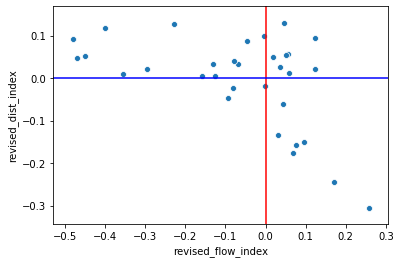

In [65]:
revise_dic_seoul = {'revised_flow_index' : seoul_index['flow_index'] - seoul_flow_index,
              'revised_dist_index' : seoul_index['dist_index'] - seoul_dist_index}

revised_seoul_index = pd.DataFrame(revise_dic_seoul)

# 서울의 유동인구 / 물류 지표를 보정한 후 집단 나누기(동화동 제거)
sns.scatterplot(x = 'revised_flow_index', y ='revised_dist_index', data = revised_seoul_index.drop('동화동', axis=0))

plt.axvline(x=0, color='red')
plt.axhline(y=0, color='blue')
plt.show()

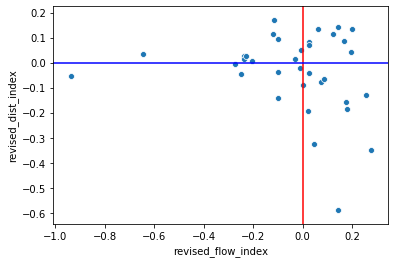

In [67]:
revise_dic_daegu = {'revised_flow_index' : daegu_index['flow_index'] - daegu_flow_index,
              'revised_dist_index' : daegu_index['dist_index'] - daegu_dist_index}

revised_daegu_index = pd.DataFrame(revise_dic_daegu)

# 대구의 유동인구 / 물류 지표를 보정한 후 집단 나누기
sns.scatterplot(x = 'revised_flow_index', y ='revised_dist_index', data = revised_daegu_index)

plt.axvline(x=0, color='red')
plt.axhline(y=0, color='blue')
plt.show()

In [69]:
minhyeok = revised_seoul_index[revised_seoul_index['revised_flow_index'] > 0]
minhyeok

,revised_flow_index,revised_dist_index
공릉2동,0.044233,-0.061513
광희동,0.096790,-0.151152
명동,0.258156,-0.304603
상계10동,0.056649,0.057686
소공동,0.076191,-0.158095
을지로동,0.067559,-0.175770
장충동,0.123546,0.094008
중계1동,0.045264,0.130131
중계2.3동,0.057576,0.011257
중림동,0.051516,0.053813


In [ ]:
def grap(dong):
    

In [70]:
cj_data

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
0,20190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,20190201,2019,2,1,4,4,금
1,20190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,20190201,2019,2,1,4,4,금
2,20190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,20190201,2019,2,1,4,4,금
3,20190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,20190201,2019,2,1,4,4,금
4,20190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,20190201,2019,2,1,4,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156566,20200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,20200531,2020,5,31,22,6,일
156567,20200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21,20200531,2020,5,31,22,6,일
156568,20200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,20200531,2020,5,31,22,6,일
156569,20200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,20200531,2020,5,31,22,6,일


In [ ]:
cj_2019_seoul
cj_2020_seoul

In [72]:
cj_2019_seoul[cj_2019_seoul['HDNG_NM']=='공릉2동']

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
32,20190201,가구/인테리어,10,서울특별시,11,노원구,35,공릉2동,600,3.486818e-06,20190201,2019,2,1,4,4,금
90,20190201,식품,17,서울특별시,11,노원구,35,공릉2동,600,9.370823e-06,20190201,2019,2,1,4,4,금
321,20190201,스포츠/레저,16,서울특별시,11,노원구,35,공릉2동,600,6.537784e-07,20190201,2019,2,1,4,4,금
345,20190201,도서/음반,12,서울특별시,11,노원구,35,공릉2동,600,1.786994e-05,20190201,2019,2,1,4,4,금
438,20190201,생활건강,15,서울특별시,11,노원구,35,공릉2동,600,8.063267e-06,20190201,2019,2,1,4,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76665,20190531,생활건강,15,서울특별시,11,노원구,35,공릉2동,600,7.365903e-05,20190531,2019,5,31,21,4,금
76728,20190531,스포츠/레저,16,서울특별시,11,노원구,35,공릉2동,600,8.063267e-06,20190531,2019,5,31,21,4,금
76756,20190531,출산/육아,18,서울특별시,11,노원구,35,공릉2동,600,3.050966e-06,20190531,2019,5,31,21,4,금
76821,20190531,패션의류,19,서울특별시,11,노원구,35,공릉2동,600,1.170263e-04,20190531,2019,5,31,21,4,금


In [ ]:
plt.figure(figsize=(7,7))
plt.xlim(2,5)
plt.xticks([2,3,4,5])
plt.plot([2,3,4,5], one.values, 'b*-', label='2019')
plt.plot([2,3,4,5], two.values, 'r*-', label='2020')
plt.legend()

In [80]:
card_re = pd.read_csv("Shinhan/CARD_SPENDING_RESIDENT.txt", sep ="\t")

In [81]:
card_fo = pd.read_csv("Shinhan/CARD_SPENDING_FOREIGNER.txt", sep ="\t", encoding='CP949')

In [86]:
card_re = card_re.merge(date_table, how='left', left_on = 'STD_DD', right_on = 'STD_DD')
card_re

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day,week_num,day_of_week,day_of_week_kr
0,20190201,110,517,10,F,25,11,595,2019,2,1,4,4,금
1,20190201,110,517,10,F,50,5,243,2019,2,1,4,4,금
2,20190201,110,517,10,F,55,5,27,2019,2,1,4,4,금
3,20190201,110,517,10,M,20,11,243,2019,2,1,4,4,금
4,20190201,110,517,10,M,25,11,433,2019,2,1,4,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127,2020,5,31,22,6,일
2537749,20200531,350,720,81,M,50,33,211,2020,5,31,22,6,일
2537750,20200531,350,720,81,M,55,9,61,2020,5,31,22,6,일
2537751,20200531,350,720,81,M,60,19,194,2020,5,31,22,6,일


In [85]:
card_re

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194


In [83]:
card_fo

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0
...,...,...,...,...,...,...,...
238824,20200507,350,640,40,오스트레일리아,6,29.0
238825,20200512,350,612,40,오스트레일리아,3,15.0
238826,20200512,350,670,40,오스트레일리아,2,13.0
238827,20200516,350,640,71,오스트레일리아,1,39.0


In [92]:
dong = pd.read_excel('Shinhan/dong.xlsx')
dong

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,구코드,행정동코드,구명,행정동명
1,NaN,140,520,서울 중구,소공동
2,NaN,140,540,서울 중구,회현동
3,NaN,140,550,서울 중구,명동
4,NaN,140,570,서울 중구,필동
...,...,...,...,...,...
65,NaN,110,650,대구 중구,남산2동
66,NaN,110,660,대구 중구,남산3동
67,NaN,110,670,대구 중구,남산4동
68,NaN,110,680,대구 중구,대봉1동


In [93]:
dong = dong.rename(columns=dong.iloc[0])

In [102]:
dong = dong[1:]

In [113]:
list(dong.columns)

[nan, '구코드', '행정동코드', '구명', '행정동명']

In [116]:
dong = dong.loc[list(dong.index),list(dong.columns)[1:]]

In [121]:
dong['행정동코드'].astype()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 1 to 69
Data columns (total 4 columns):
구코드      69 non-null object
행정동코드    69 non-null object
구명       69 non-null object
행정동명     69 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [122]:
dong.astype({'행정동코드':'int'}).dtypes

구코드      object
행정동코드     int32
구명       object
행정동명     object
dtype: object

In [126]:
card_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2537753 entries, 0 to 2537752
Data columns (total 14 columns):
STD_DD            int64
GU_CD             int64
DONG_CD           int64
MCT_CAT_CD        int64
SEX_CD            object
AGE_CD            int64
USE_CNT           int64
USE_AMT           int64
year              int64
month             int64
day               int64
week_num          int64
day_of_week       int64
day_of_week_kr    object
dtypes: int64(12), object(2)
memory usage: 290.4+ MB


In [123]:
my_data = card_re.merge(dong, how='left', left_on = 'DONG_CD', right_on = '행정동코드')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [107]:
card_fo.merge(dong, how='inner')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [185]:
mhlist = [600, 720, 550, 520, 605, 580, 621, 625, 680, 645, 570, 611, 612, 540]

In [ ]:
공릉2동 600
//광희동 720
명동 550
상계10동 
소공동
을지로동
장충동
중계1동
중계2.3동
중림동
청구동
필동
하계1동
하계2동
회현동

In [129]:
cj_data[cj_data['HDNG_NM']=='공릉2동']

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
32,20190201,가구/인테리어,10,서울특별시,11,노원구,35,공릉2동,600,16,20190201,2019,2,1,4,4,금
90,20190201,식품,17,서울특별시,11,노원구,35,공릉2동,600,43,20190201,2019,2,1,4,4,금
321,20190201,스포츠/레저,16,서울특별시,11,노원구,35,공릉2동,600,3,20190201,2019,2,1,4,4,금
345,20190201,도서/음반,12,서울특별시,11,노원구,35,공릉2동,600,82,20190201,2019,2,1,4,4,금
438,20190201,생활건강,15,서울특별시,11,노원구,35,공릉2동,600,37,20190201,2019,2,1,4,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156226,20200531,패션잡화,20,서울특별시,11,노원구,35,공릉2동,600,5,20200531,2020,5,31,22,6,일
156303,20200531,도서/음반,12,서울특별시,11,노원구,35,공릉2동,600,79,20200531,2020,5,31,22,6,일
156427,20200531,패션의류,19,서울특별시,11,노원구,35,공릉2동,600,47,20200531,2020,5,31,22,6,일
156503,20200531,화장품/미용,21,서울특별시,11,노원구,35,공릉2동,600,54,20200531,2020,5,31,22,6,일


In [ ]:
cj_data[cj_data['HDNG_NM']=='공릉2동']

In [130]:
one = daegu_one_susung.xs(21, axis=0, level=1)[:4]
two = daegu_one_susung.xs(21, axis=0, level=1)[4:]

plt.figure(figsize=(7,7))
plt.xlim(2,5)
plt.xticks([2,3,4,5])
plt.plot([2,3,4,5], one.values, 'b*-', label='2019')
plt.plot([2,3,4,5], two.values, 'r*-', label='2020')
plt.legend()

plt.show()

NameError: name 'cj_data_2019' is not defined

In [132]:
card_re

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day,week_num,day_of_week,day_of_week_kr
0,20190201,110,517,10,F,25,11,595,2019,2,1,4,4,금
1,20190201,110,517,10,F,50,5,243,2019,2,1,4,4,금
2,20190201,110,517,10,F,55,5,27,2019,2,1,4,4,금
3,20190201,110,517,10,M,20,11,243,2019,2,1,4,4,금
4,20190201,110,517,10,M,25,11,433,2019,2,1,4,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127,2020,5,31,22,6,일
2537749,20200531,350,720,81,M,50,33,211,2020,5,31,22,6,일
2537750,20200531,350,720,81,M,55,9,61,2020,5,31,22,6,일
2537751,20200531,350,720,81,M,60,19,194,2020,5,31,22,6,일


In [138]:
card_2019 = card_re[card_re['year']==2019]
card_2020 = card_re[card_re['year']==2020]

In [139]:
df = card_2019[card_2019['DONG_CD']==600]
my_data = pd.DataFrame(df.groupby('week_num')['USE_AMT'].sum())
my_data

,USE_AMT
week_num,
4,943835
5,2337190
6,2896638
7,3040471
8,3018119
9,3573400
10,3318118
11,3223613
12,3363605


In [153]:
week = list(my_data.index)

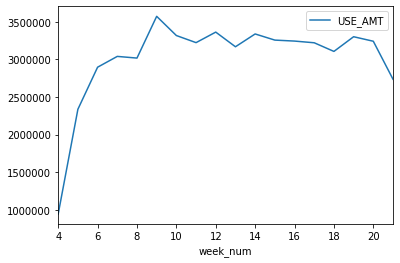

In [141]:
my_data.plot(kind='line')

In [202]:
def lyj(my):
    one = card_2019[card_re['DONG_CD']==my]
    two = card_2020[card_re['DONG_CD']==my]
    my_data = pd.DataFrame(one.groupby('week_num')['USE_CNT'].sum())
    my_data2 = pd.DataFrame(two.groupby('week_num')['USE_CNT'].sum())
    plt.figure(figsize=(10,10))
    st = my
    plt.title(st)
    plt.plot(week, my_data.values, 'b*-', label='2019')
    plt.plot(list(my_data2.index), my_data2.values, 'r*-', label='2020')
    plt.legend()
    plt.show()

In [201]:
def smh(my):
    one = card_2019[card_re['DONG_CD']==my]
    two = card_2020[card_re['DONG_CD']==my]
    my_data = pd.DataFrame(one.groupby('week_num')['USE_AMT'].sum())
    my_data2 = pd.DataFrame(two.groupby('week_num')['USE_AMT'].sum())
    plt.figure(figsize=(10,10))
    st = my
    plt.title(st)
    plt.plot(week, my_data.values, 'b*-', label='2019')
    plt.plot(list(my_data2.index), my_data2.values, 'r*-', label='2020')
    plt.legend()
    plt.show()

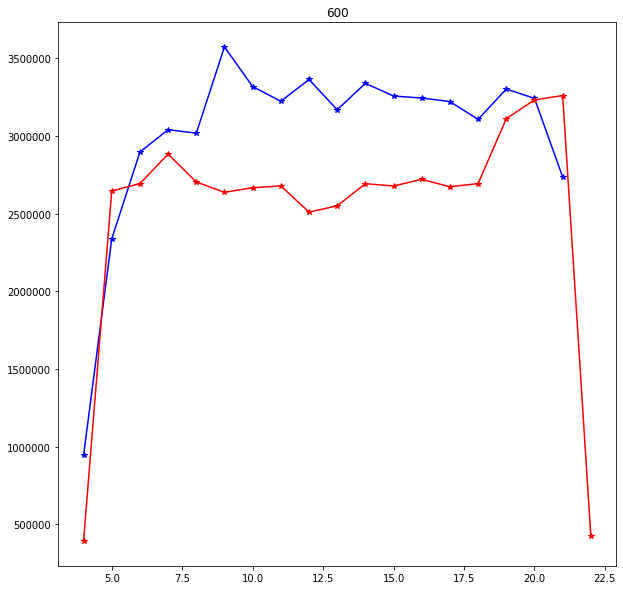

In [188]:
# 공릉 2동
smh(600)

In [ ]:
# 공릉 2동
smh()

In [ ]:
# 첫번째 AMT, 두번째 CMT

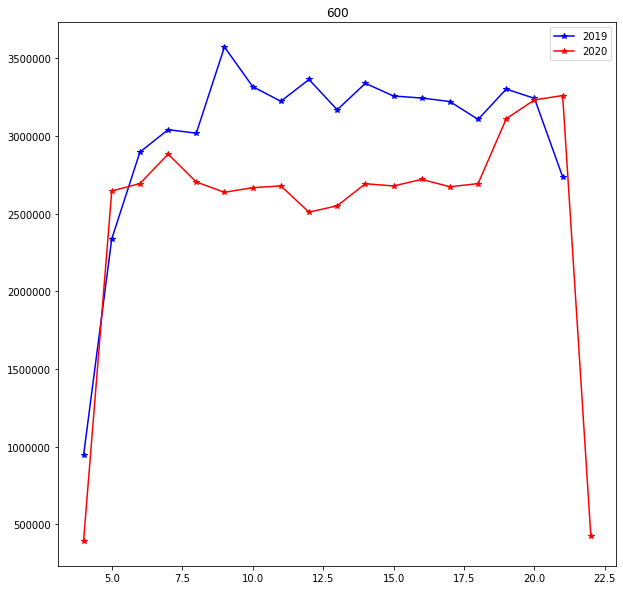

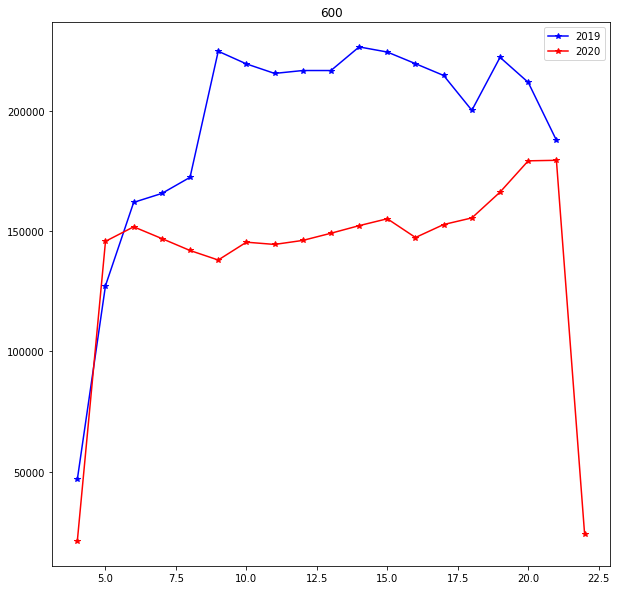

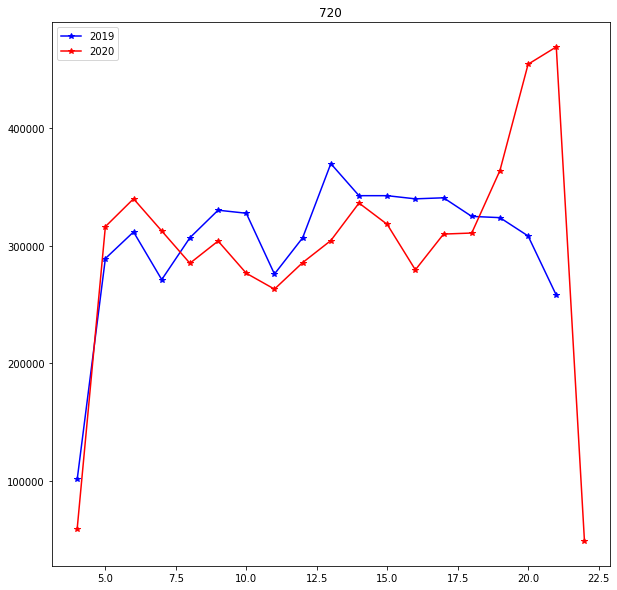

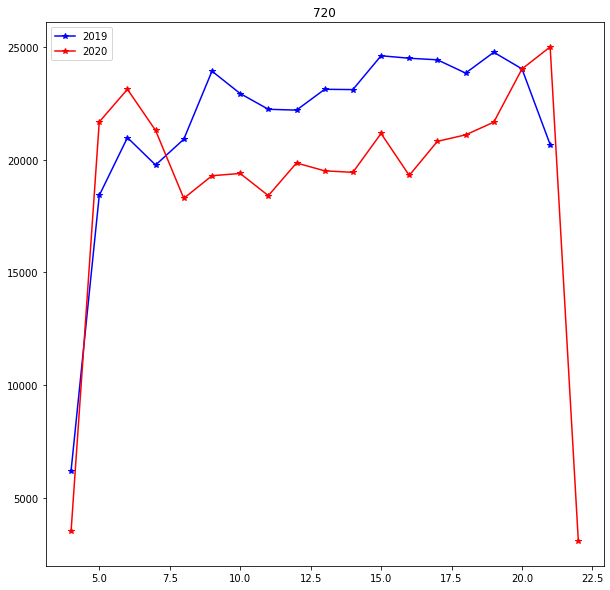

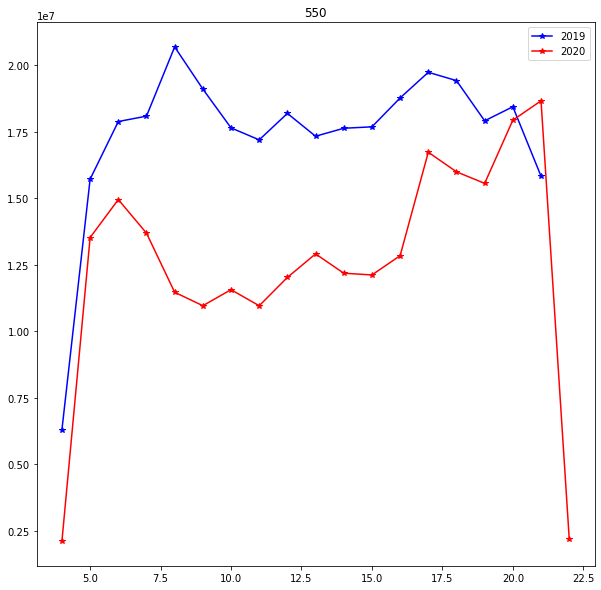

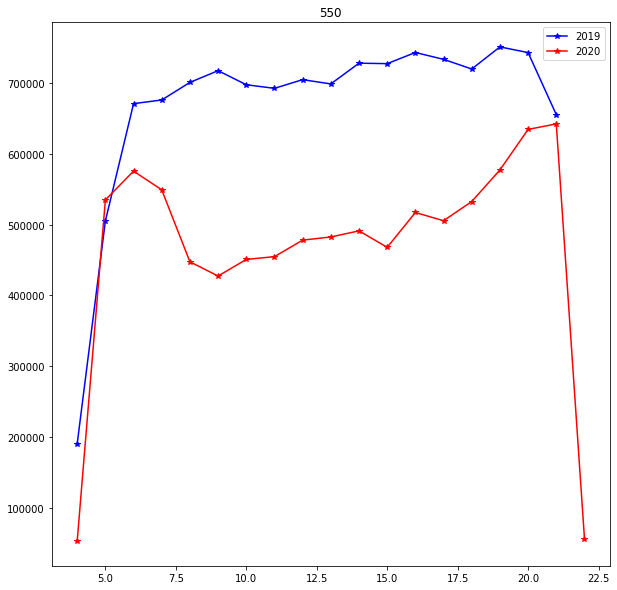

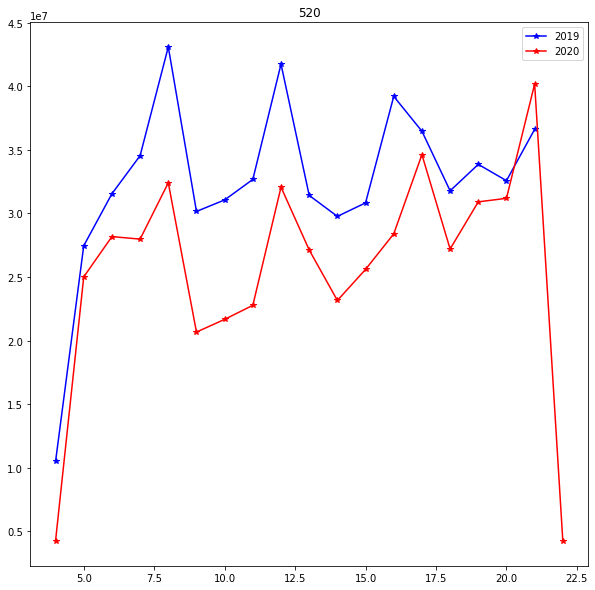

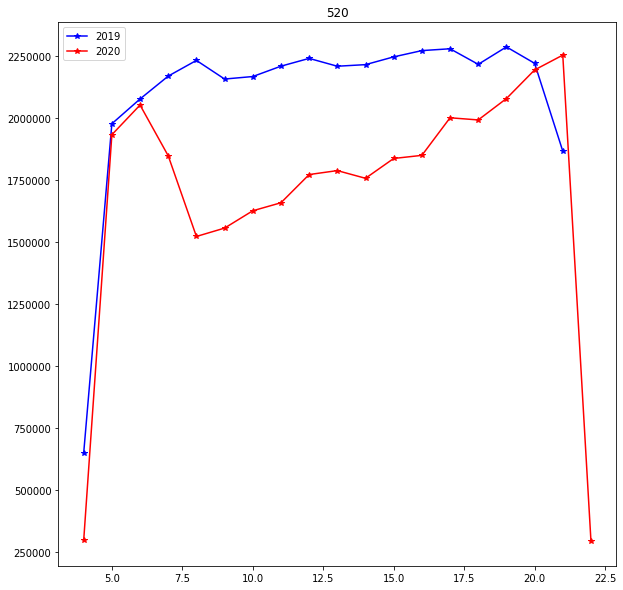

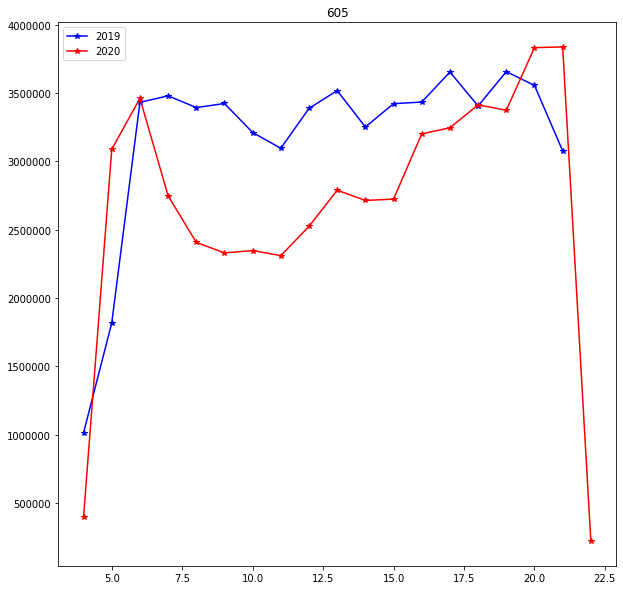

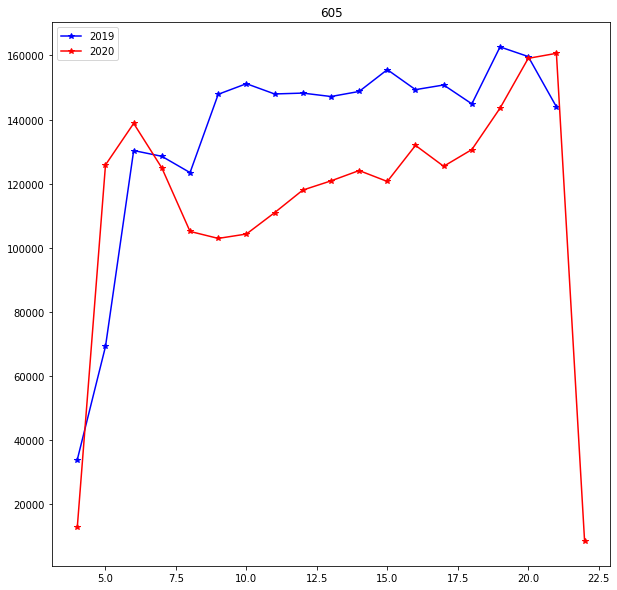

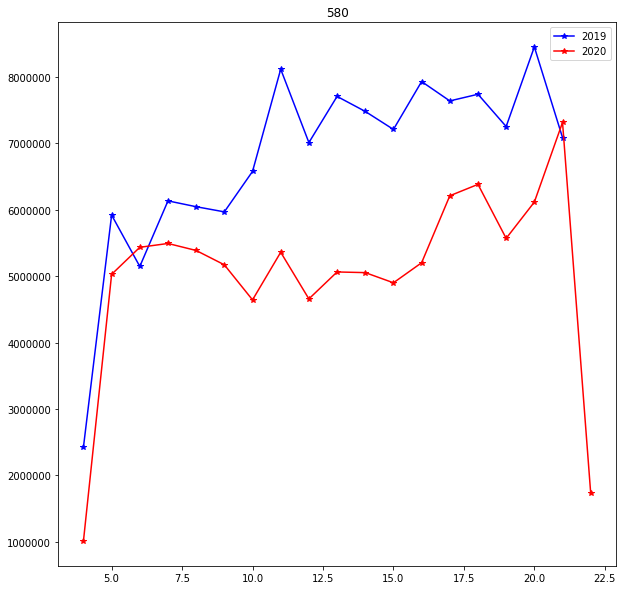

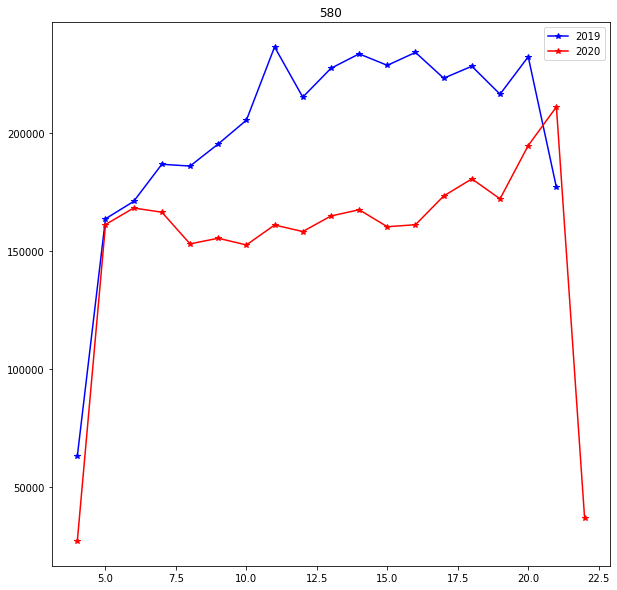

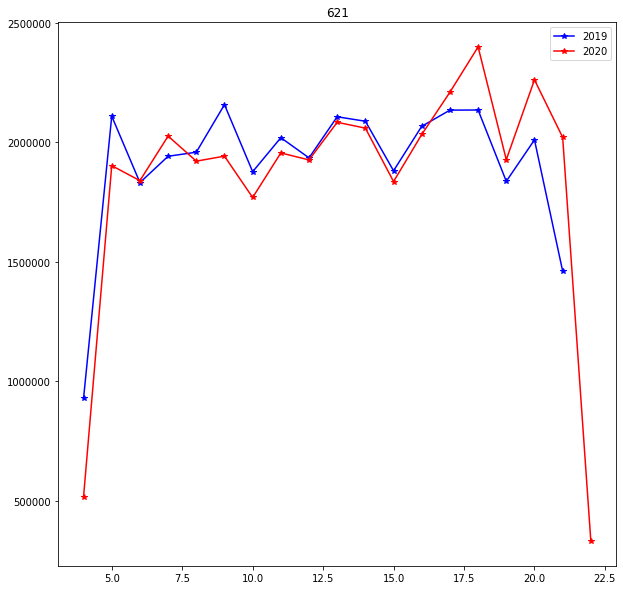

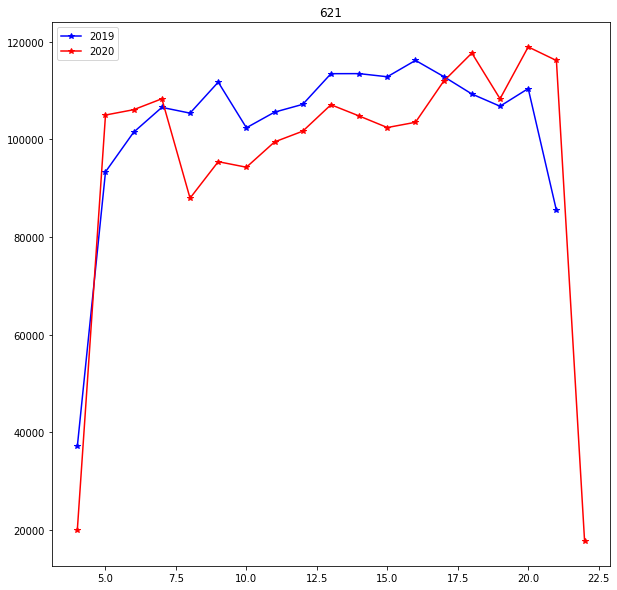

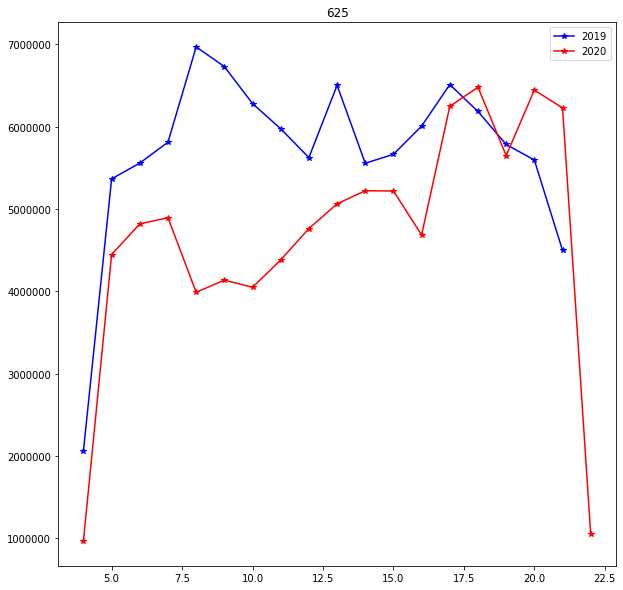

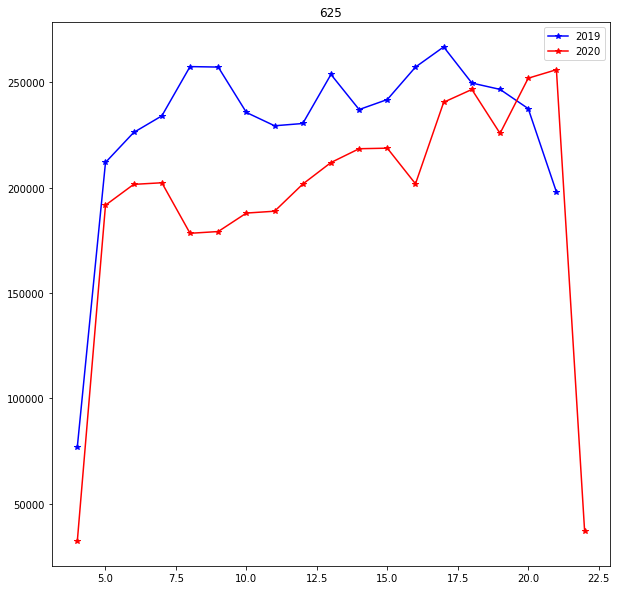

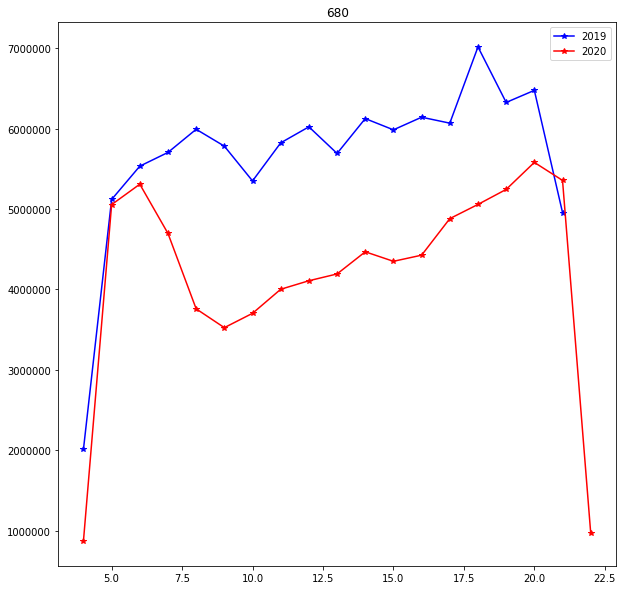

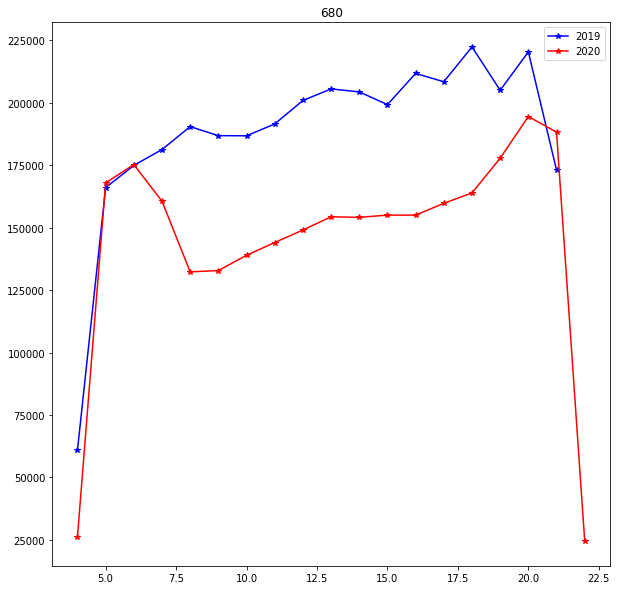

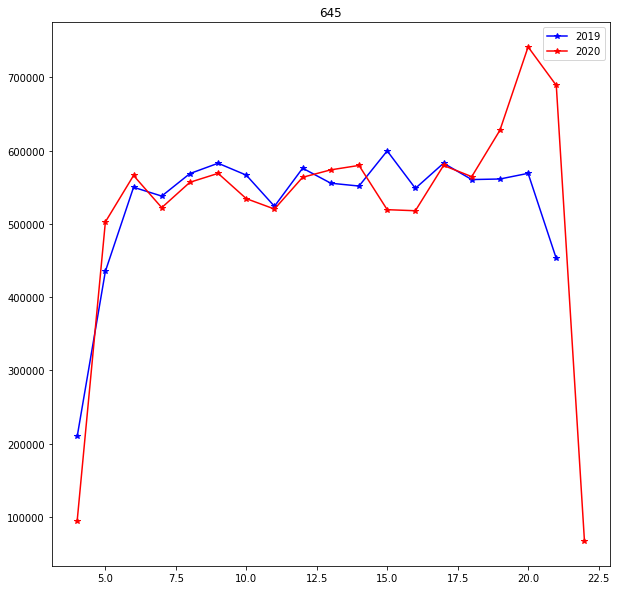

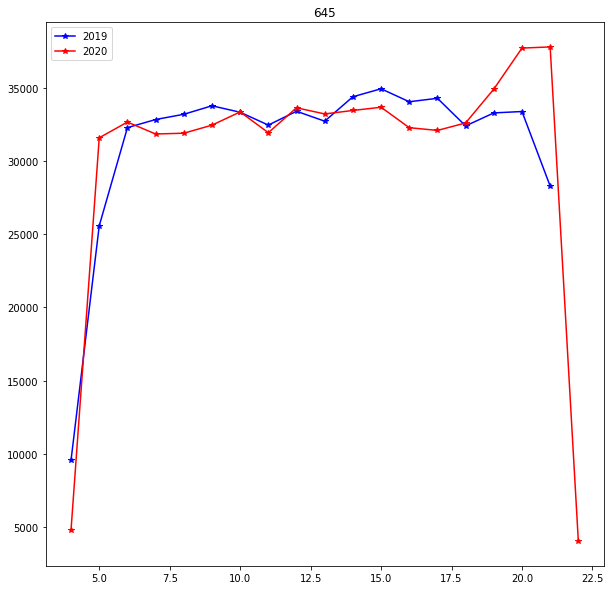

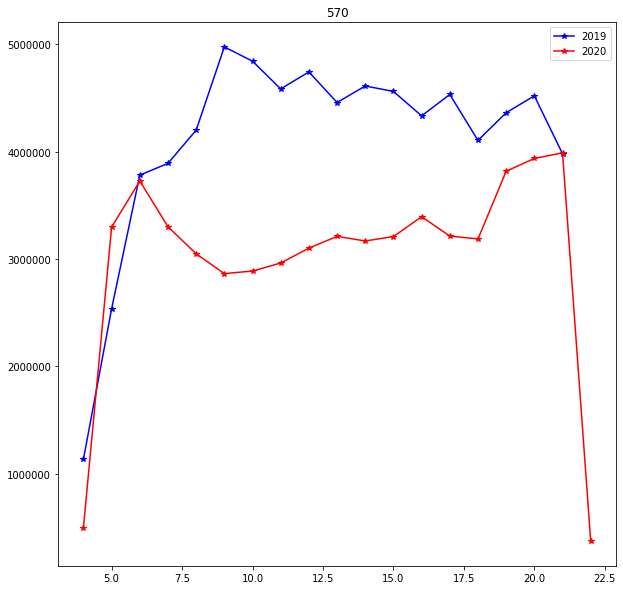

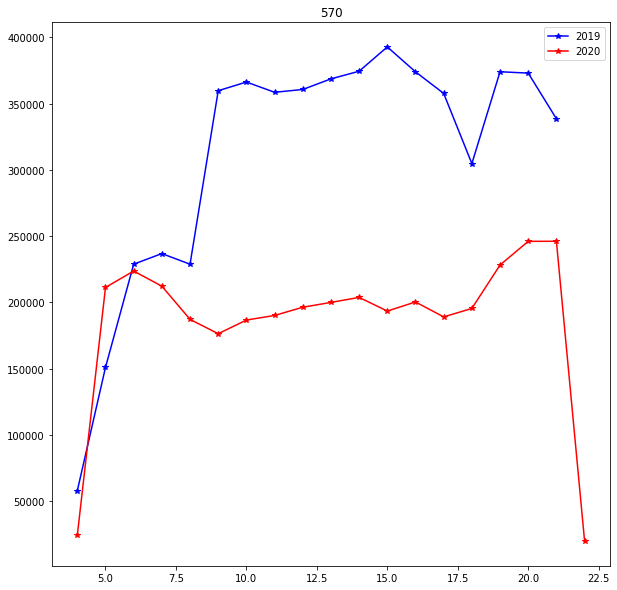

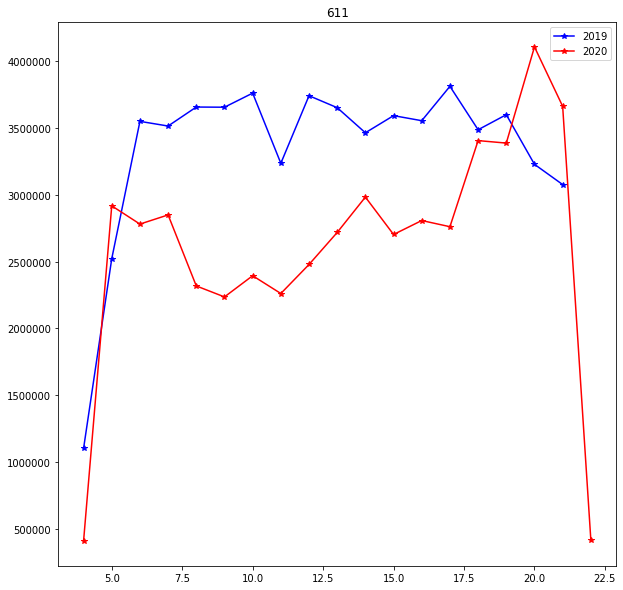

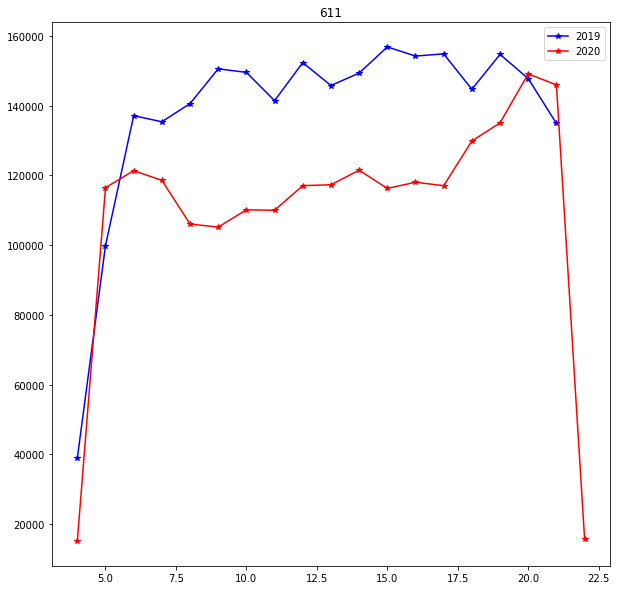

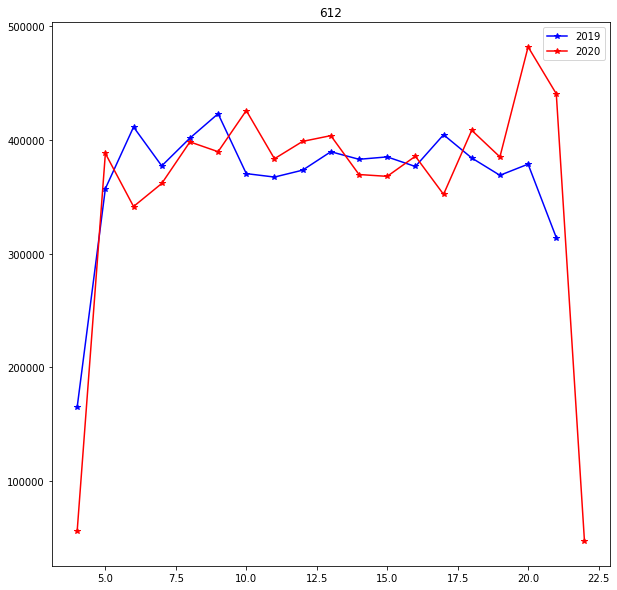

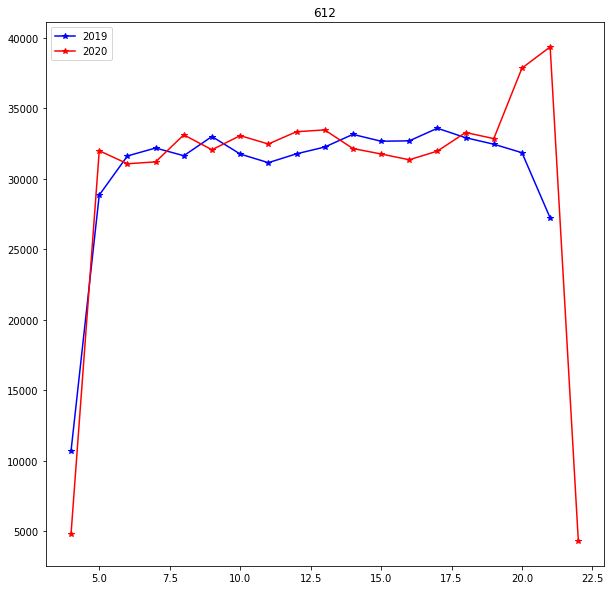

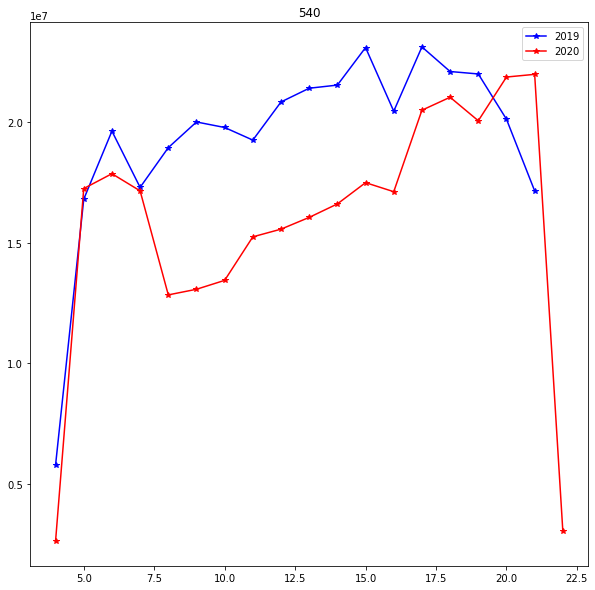

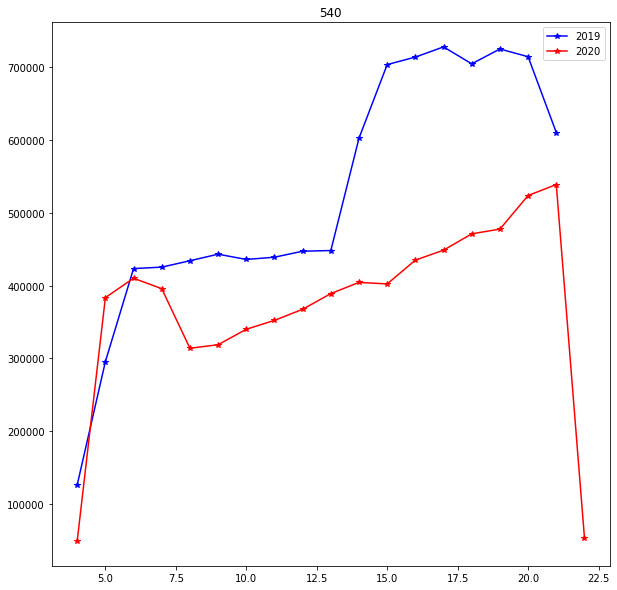

In [203]:
for i in mhlist:
    smh(i)
    lyj(i)

In [ ]:
645, 612 이상
청구동, 하계 2동

보통 AMT보다 CMT에서 감소 폭이 큼
그 이유로 내 생각에는 한번 갈 때 많이사는듯?

In [ ]:
청구동과 하계 2동에 대한 조사